# Grupo 1

<a>Integrantes </a>
- Xavier Granda
- Joel Molina
- Bryan Noboa
- Miguel Castillo
- Junior Zambrano
- Jhandry Zambrano

In [ ]:
'''Importar las librerias para el desarrollo de este taller'''
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import HTML,display
import bar_chart_race as bcr
from plotnine import *


In [2]:
''' Cargamos el dataset'''
df_total = pd.read_csv('population_2018.csv')
df_total.head()

,Unnamed: 0,Value
0,China,1392730000
1,India,1352617328
2,US,326687501
3,Indonesia,267663435
4,Pakistan,212215030


In [3]:
'''Usaremos los valores en millones de unidades'''
df = df_total['Value']/1000000
df 

0      1392.730000
1      1352.617328
2       326.687501
3       267.663435
4       212.215030
          ...     
178       0.077006
179       0.071625
180       0.052441
181       0.038682
182       0.037910
Name: Value, Length: 183, dtype: float64

In [10]:
'''Graficar'''
fig = px.bar(df_total,x='Unnamed: 0',y='Value',labels={'Unnamed: 0':'Ciudad','Value':'Poblacion'},title="Poblacion por ciudad:") 
fig.show()

In [11]:
''' '''
df.describe()

count     183.000000
mean       41.249227
std       148.012775
min         0.037910
25%         2.743863
50%         9.630959
75%        29.631535
max      1392.730000
Name: Value, dtype: float64

In [13]:
media = df.mean()
media

41.24922684153004

In [15]:
mediana = df.median()
mediana

9.630959

In [16]:
moda = df.mode()
moda

0         0.037910
1         0.038682
2         0.052441
3         0.071625
4         0.077006
          ...     
178     212.215030
179     267.663435
180     326.687501
181    1352.617328
182    1392.730000
Name: Value, Length: 183, dtype: float64

In [17]:
print(" Valor máximo :", df.max())
print(" Valor mínimo :", df.min())

 Valor máximo : 1392.73
 Valor mínimo : 0.03791


In [5]:
'''Desvio medio'''
md = df.mad()
md

50.923121459524026

In [6]:
'''Es decir, en promedio los valores están a 50.93 millones de unidades de la Media'''

'Es decir, en promedio los valores están a 50.93 millones de unidades de la Media'

In [7]:
'''Varianza'''
var = df.var(ddof=0)
var

21788.066901743456

In [8]:
'''Desviacion tipica/estandard'''
std = df.std(ddof=0)
std

147.60781450093845

In [18]:
df.quantile([.25,.50,.75])

0.25     2.743863
0.50     9.630959
0.75    29.631535
Name: Value, dtype: float64

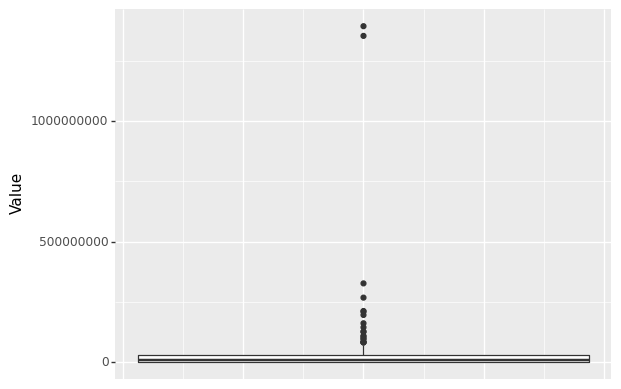

<ggplot: (123059523756)>

In [20]:
(ggplot(df_total) +
  geom_boxplot(aes(x=0, y="Value")) +
  labs(x="") +
  theme(
    axis_text_x=element_blank(),
    axis_ticks_minor_x=element_blank(),
    axis_ticks_major_x=element_blank()
  ))

Las medidas de posición nos permiten resumir la distribución de una variable muy rápidamente, y si además utilizamos un diagrama de cajas, mejor. Esto las convierte en unas de las herramientas más poderosas de la estadística descriptiva. El hecho que los datos no contengan datos atipiocos, no se determinan errores con el mismo hecho de ser datos con valores alto se presentan el grafico anterior.